In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime

# Carregar os dados
df = pd.read_excel('base_historica_consolidada.xlsx')

names = {
    'Média de Preço - petróleo bruto - Brent (FOB)': 'preco',
    'Salário mínimo real - R$': 'salario_minimo',
    'PIB - R$ (milhões)': 'pib',
    'Taxa de câmbio - R$ / US$ - comercial - compra - média': 'cambio',
    'INPC - geral - índice': 'inpc',
    'Mês/Ano' : 'data'
}

df.rename(columns=names, inplace=True)

# Converter a coluna de data para o formato apropriado
df['data'] = pd.to_datetime(df['data'])

# Filtra periodo acima de 2013
df = df[df['data'] >= '2013-01-01']

# Configurar a data como índice
df.set_index('data', inplace=True)

# Exibir as primeiras linhas do conjunto de dados
df.head()

,preco,salario_minimo,pib,cambio,inpc
data,,,,,
2013-01-01,112.668333,1250.789518,414131.8,2.030477,3749.25
2013-02-01,116.122692,1244.317771,398645.4,1.972678,3768.75
2013-03-01,109.133333,1236.897208,427409.8,1.982270,3791.36
2013-04-01,102.704667,1229.642004,438856.8,2.001632,3813.73
2013-05-01,102.303548,1225.352645,439054.2,2.034267,3827.08


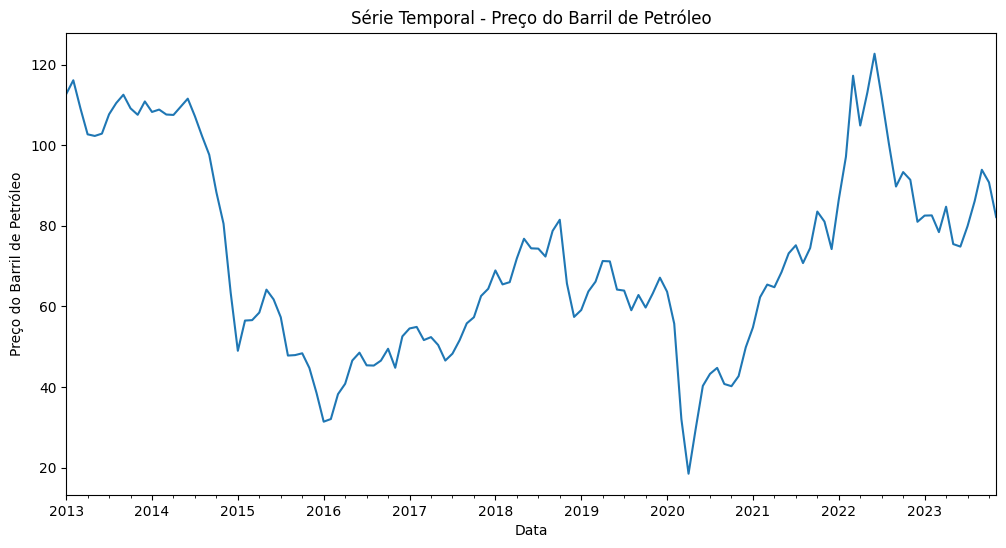

In [10]:
# Plotar a série temporal
df['preco'].plot(figsize=(12, 6))
plt.title('Série Temporal - Preço do Barril de Petróleo')
plt.xlabel('Data')
plt.ylabel('Preço do Barril de Petróleo')
plt.show()

In [12]:
# Dividir os dados em conjuntos de treinamento e teste
train_size = int(len(df) * 0.90)
train, test = df[:train_size], df[train_size:]

# Ajustar o modelo SARIMA aos dados de treinamento
order = (1, 1, 1)  # Ordem dos componentes ARIMA
seasonal_order = (1, 1, 1, 12)  # Ordem sazonal
model = SARIMAX(train['preco'], order=order, seasonal_order=seasonal_order)
result = model.fit(disp=False)

# Fazer previsões
start_index = len(train)
end_index = len(train) + len(test) - 1
predictions = result.predict(start=start_index, end=end_index, dynamic=False, typ='levels')

/Users/pedroferreira/.pyenv/versions/3.10.12/envs/venv-3.10-fiap/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/pedroferreira/.pyenv/versions/3.10.12/envs/venv-3.10-fiap/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/pedroferreira/.pyenv/versions/3.10.12/envs/venv-3.10-fiap/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


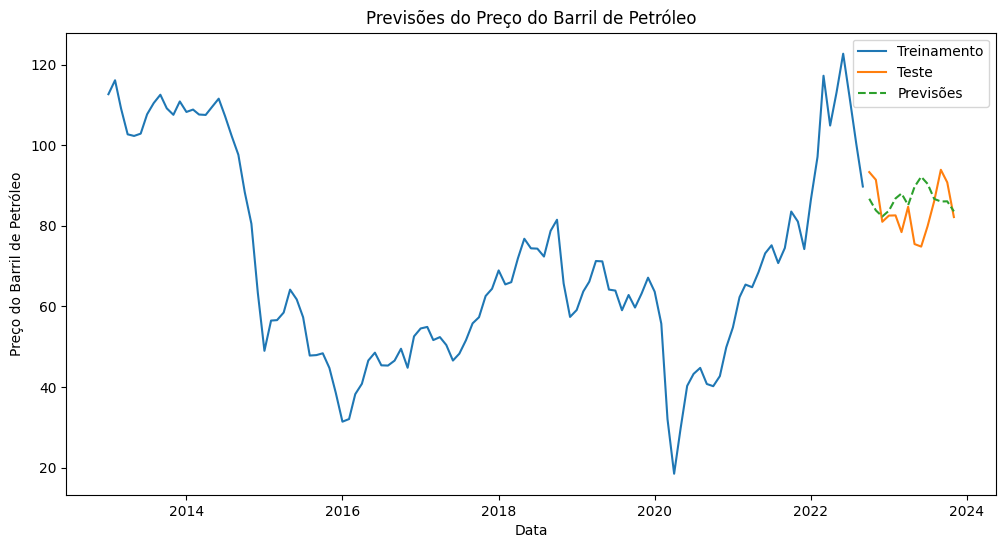

In [4]:
# Plotar as previsões em comparação com os dados reais
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['preco'], label='Treinamento')
plt.plot(test.index, test['preco'], label='Teste')
plt.plot(test.index, predictions, label='Previsões', linestyle='--')
plt.title('Previsões do Preço do Barril de Petróleo')
plt.xlabel('Data')
plt.ylabel('Preço do Barril de Petróleo')
plt.legend()
plt.show()

In [5]:
mae = mean_absolute_error(test['preco'], predictions)
print(f'MAE: {mae}')

mse = mean_squared_error(test['preco'], predictions)
print(f'MSE: {mse}')

rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test['preco'], predictions)
print(f'MAPE: {mape}%')


MAE: 6.248747355487559
MSE: 65.2514301134018
RMSE: 8.077835732013977
MAPE: 7.66396233111297%
